In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [5]:
terror_data = "Terrorism_Middle_East.csv"

df1 = pd.read_csv(terror_data, encoding = "Latin")

df2 = df1[["iyear","imonth", "country_txt", "city", "nkill","nwound"]]

df = df2.rename(columns = {"iyear": "Year","imonth": "Month", "country_txt": "Country",
                         "city":"City","nkill":"Casualties","nwound":"Number Wounded"})


C:\Users\m_sha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (63,79,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df.head()

,Year,Month,Country,City,Casualties,Number Wounded
0,2012,1,Iraq,Samarra,0.0,2.0
1,2012,1,Iraq,Qara Durra,1.0,4.0
2,2012,1,Iraq,Baghdad,0.0,5.0
3,2012,1,Iraq,Baghdad,0.0,4.0
4,2012,1,Iraq,Bohruz,1.0,2.0


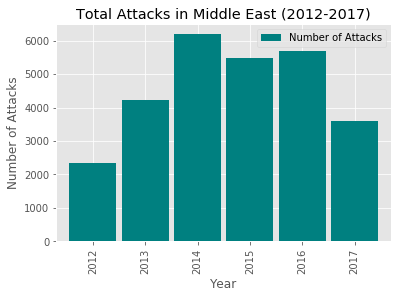

In [7]:
middle_east = df.groupby(["Year"]).count()
middle_east_countries = middle_east[["Country"]]
middle_east_country = middle_east_countries.rename(columns = {"Country":"Number of Attacks"})

middle_east_chart1 = middle_east_country.plot(kind = 'bar', width = 0.9, color = ["teal"])
middle_east_chart1.set_xlabel("Year")
middle_east_chart1.set_ylabel("Number of Attacks")
middle_east_chart1.set_title("Total Attacks in Middle East (2012-2017)")
middle_east_chart1

In [8]:
terror_data_w = "Terrorism.csv"
df1w = pd.read_csv(terror_data_w, encoding = "Latin")
df2w = df1w[["iyear","imonth", "country_txt", "city", "nkill","nwound"]]
dfw = df2w.rename(columns = {"iyear": "Year","imonth": "Month", "country_txt": "Country",
                         "city":"City","nkill":"Casualties","nwound":"Number Wounded"})


C:\Users\m_sha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (61,63,79,114,115) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
dfw.head()

,Year,Month,Country,City,Casualties,Number Wounded
0,2012,1,Pakistan,Quetta,0.0,12.0
1,2012,1,Kenya,Garissa,3.0,14.0
2,2012,1,Pakistan,Sui,4.0,3.0
3,2012,1,Kenya,Garissa,2.0,14.0
4,2012,1,Pakistan,Peer Chhatta,0.0,0.0


In [10]:
worldwide = dfw.groupby(["Year"]).count()
worldwidecount = worldwide[["Country"]]
worldwidecount = worldwidecount.rename(columns = {"Country":"Number of Attacks"})

percent = middle_east_country/worldwidecount*100
percent = percent.rename(columns = {"Number of Attacks":"Percent"})

In [11]:
percent.head(6)

,Percent
Year,
2012,27.563952
2013,35.227650
2014,36.608886
2015,36.585366
2016,41.812026
2017,32.899083


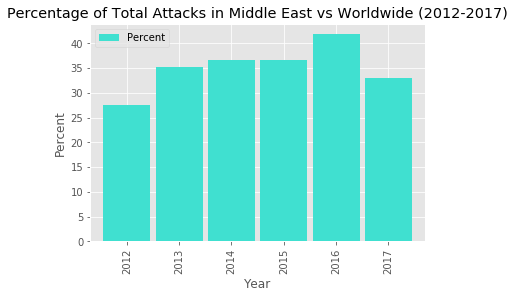

In [12]:
percent_chart = percent.plot(kind = 'bar', width = 0.9, color = ["turquoise"])
percent_chart.set_xlabel("Year")
percent_chart.set_ylabel("Percent")
percent_chart.set_title("Percentage of Total Attacks in Middle East vs Worldwide (2012-2017)")
percent_chart

In [13]:
percent_population_middle_east_worldwide = 254438981/7656044665*100
percent_population_middle_east_worldwide

3.3233737802390415

In [14]:
rest = worldwidecount - middle_east_country

combined = pd.merge(middle_east_country, rest , on = "Year")
combined_renamed = combined.rename(columns = {"Number of Attacks_x":"Middle East",
                                              "Number of Attacks_y":"Rest of the World"})
combined_renamed.head(6)

,Middle East,Rest of the World
Year,,
2012,2349,6173
2013,4240,7796
2014,6188,10715
2015,5475,9490
2016,5681,7906
2017,3586,7314


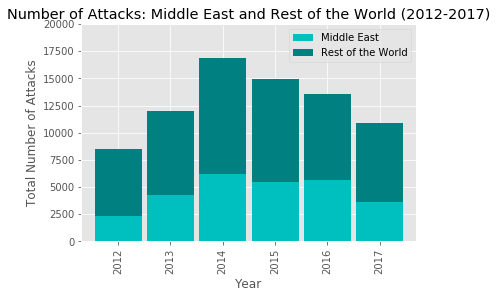

In [15]:
combined_chart = combined_renamed.plot(kind = "bar", stacked = True, title = "", width = 0.9, color = ["c","teal"])
combined_chart.set_xlabel("Year")
combined_chart.set_ylabel("Total Number of Attacks")
combined_chart.set_title("Number of Attacks: Middle East and Rest of the World (2012-2017)")
plt.ylim((0,20000))
combined_chart

In [16]:
combined_2017 = combined_renamed.iloc[5:6]/10900*100
combined_2017.head()

,Middle East,Rest of the World
Year,,
2017,32.899083,67.100917


In [17]:
combined_2017["Middle East"]

Year
2017    32.899083
Name: Middle East, dtype: float64

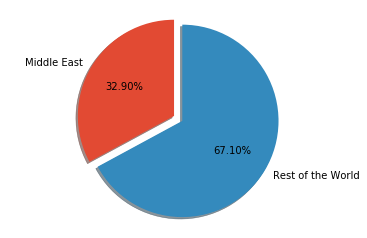

In [27]:
labels = 'Middle East', 'Rest of the World'
sizes = [middle_east_pct, rest_of_world_pct]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, autopct='%.2f%%',
        shadow = True, startangle = 90)
ax1.axis('equal')

plt.show()
